# CAMUS - Prediction

In [1]:
# Imports
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import json
import cv2

# Plot function

In [2]:
def plots_with_transparency(title, ED, ED_p, ED_gt, ES, ES_p, ES_gt):
    fig = plt.figure(figsize=(15, 10))
    gs = fig.add_gridspec(2, 3, hspace=0.1, wspace=0.1)
    (ax1, ax2, ax3), (ax4, ax5, ax6) = gs.subplots(sharex='col', sharey='row')

    # END-DIASTOLIC
    ax1.imshow(ED[0], cmap='gray')
    ax1.axis('auto')
    ax1.set_ylabel("End Diastolic", fontsize=15)
    ax1.set_title("Original frame", fontsize=15)
    
    ax2.imshow(ED[0], cmap='gray')
    ax2.contour(ED_p[0]==2, colors='g')
    ax2.contour(ED_p[0]==3, colors='b')
    ax2.contour(ED_p[0]==1, colors='r')
    ax2.axis('auto')
    ax2.set_title("Prediction", fontsize=15)
    
    ax3.imshow(ED[0], cmap='gray')
    ax3.contour(ED_gt[0]==2, colors='g')
    ax3.contour(ED_gt[0]==3, colors='b')
    ax3.contour(ED_gt[0]==1, colors='r')
    ax3.axis('auto')
    ax3.set_title("Ground truth", fontsize=15)

    # END-SYSTOLIC
    ax4.imshow(ES[0], cmap='gray')
    ax4.axis('auto')
    ax4.set_ylabel("End Systolic", fontsize=15)

    ax5.imshow(ES[0], cmap='gray')
    ax5.contour(ES_p[0]==2, colors='g')
    ax5.contour(ES_p[0]==3, colors='b')
    ax5.contour(ES_p[0]==1, colors='r')
#   ax5.imshow(ES_p[0], alpha=(ES_p[0]>0)*0.1, cmap='tab10')
    ax5.axis('auto')
    
    ax6.imshow(ES[0], cmap='gray')
    ax6.contour(ES_gt[0]==2, colors='g')
    ax6.contour(ES_gt[0]==3, colors='b')
    ax6.contour(ES_gt[0]==1, colors='r')
    ax6.axis('auto')

    for ax in fig.get_axes():
        ax.label_outer()

# CAMUS - Interactive segmentation results

In [3]:
def show_images(testing_folder, prediction_folder, ground_truth_folder, patient, view, zeros):
    ED_path = ('{}/patient{}{}/patient{}{}_{}_ED.mhd'.format(testing_folder, zeros, patient, zeros, patient, view))
    ED = io.imread(ED_path, plugin='simpleitk')

    ED_pred_path = ('{}/patient{}{}_{}_ED.nii'.format(prediction_folder, zeros, patient, view))
    ED_pred = io.imread(ED_pred_path, plugin='simpleitk')
    
    ED_gt_path = ('{}/patient{}{}_{}_ED.nii'.format(ground_truth_folder, zeros, patient, view))
    ED_gt = io.imread(ED_gt_path, plugin='simpleitk')

    ES_path = ('{}/patient{}{}/patient{}{}_{}_ES.mhd'.format(testing_folder, zeros, patient, zeros, patient, view))
    ES = io.imread(ES_path, plugin='simpleitk')

    ES_pred_path = ('{}/patient{}{}_{}_ES.nii'.format(prediction_folder, zeros, patient, view))
    ES_pred = io.imread(ES_pred_path, plugin='simpleitk')
    
    ES_gt_path = ('{}/patient{}{}_{}_ES.nii'.format(ground_truth_folder, zeros, patient, view))
    ES_gt = io.imread(ES_gt_path, plugin='simpleitk')
    
    plots_with_transparency('Patient{}{}_{}'.format(zeros, patient, view), ED, ED_pred, ED_gt, ES, ES_pred, ES_gt)

1. Enter patient number (1-50): 48
2. Choose view (2CH-4CH): 2CH
Loading Patient0048_2CH...


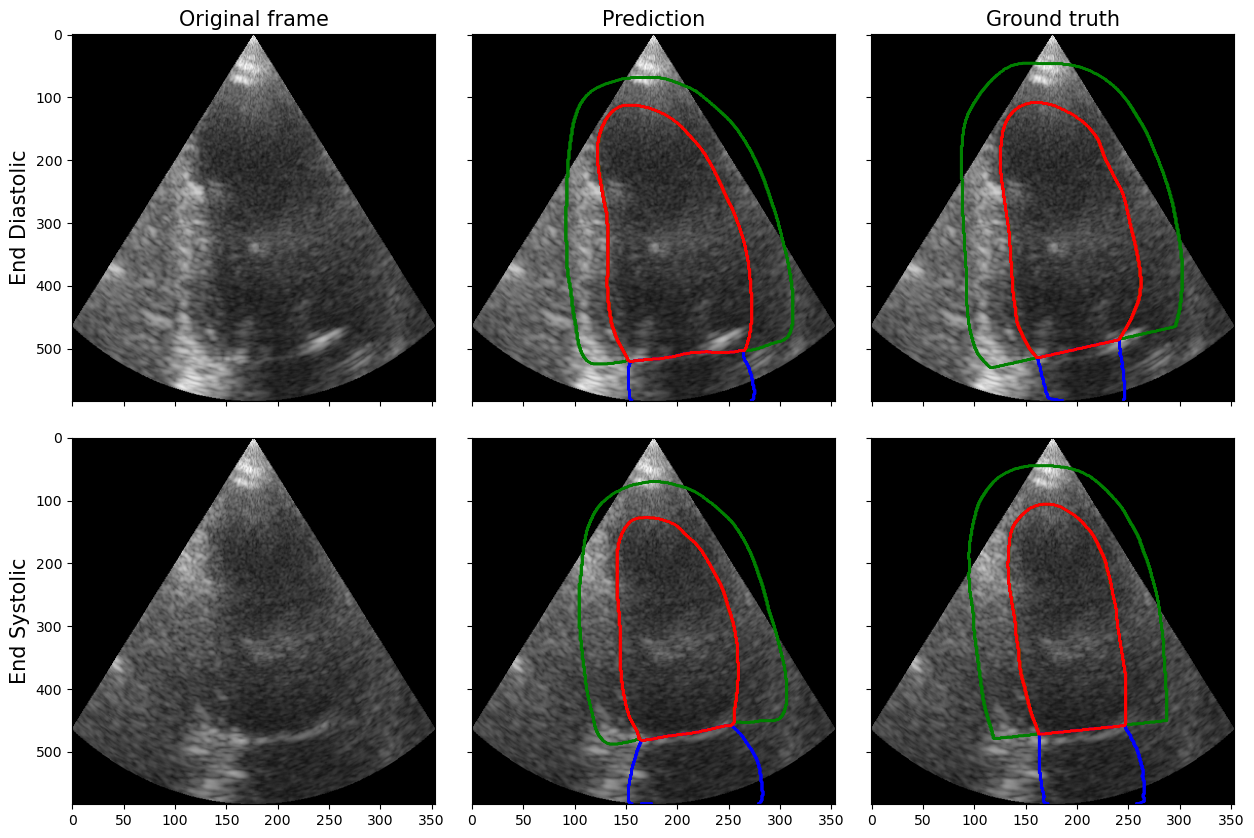

In [4]:
# Paths to testing and prediction folders
testing_folder = 'D:/TFG/Database/testing'
prediction_folder = 'D:/TFG/Results/Task250_2DLeftVentricle'
ground_truth_folder = 'D:/TFG/Results/groundtruth'

patient = input('1. Enter patient number (1-50): ')

if (len(patient)) == 1:
    view = input('2. Choose view (2CH-4CH): ')
    patient_full = 'patient000'.format(patient)
    zeros = '000'
    if view == '2CH':
        print('Loading Patient000{}_{}...'.format(patient, view))
        show_images(testing_folder, prediction_folder, ground_truth_folder, patient, view, zeros)
        
    elif view == '4CH':
        print('Loading Patient000{}_{}...'.format(patient, view))
        show_images(testing_folder, prediction_folder, ground_truth_folder, patient, view, zeros)

    else:
        print('Wrong choice! Try again')

elif (len(patient)) == 2 and patient <= '50':
    view = input('2. Choose view (2CH-4CH): ')
    zeros = '00'
    if view == '2CH':
        print('Loading Patient00{}_{}...'.format(patient, view))
        show_images(testing_folder, prediction_folder, ground_truth_folder, patient, view, zeros)
    
    elif view == '4CH':
        print('Loading Patient00{}_{}...'.format(patient, view))
        show_images(testing_folder, prediction_folder, ground_truth_folder, patient, view, zeros)
        
    else:
        print('Wrong choice! Try again') 
else:
    print('Error! Insert a number between 1 and 50')

# CAMUS - Evaluation metrics

In [4]:
f = open('D:/TFG/Results/summary.json')
data = json.load(f)

In [24]:
Bckg_dice = []
LVEpi_dice = []
LVEndo_dice = []
LA_dice = []

# for i in range(1, len(data['results']['all']), 2):
for i in range(1, len(data['results']['all']), 2):
    # Background
    Bckg_dice.append(data['results']['all'][i]['0']['Dice'])

    #Left ventricle
    LVEndo_dice.append(data['results']['all'][i]['1']['Dice'])
   
    # Wall
    LVEpi_dice.append(data['results']['all'][i]['2']['Dice'])
   
    # Left atriums
    LA_dice.append(data['results']['all'][i]['3']['Dice'])

dice_data = [Bckg_dice, LVEndo_dice, LVEpi_dice, LA_dice]

C:\Users\Oriol\AppData\Local\Temp\ipykernel_26140\4000661753.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Background', 'LV endocardium','LV epicardium', 'Left atrium'])


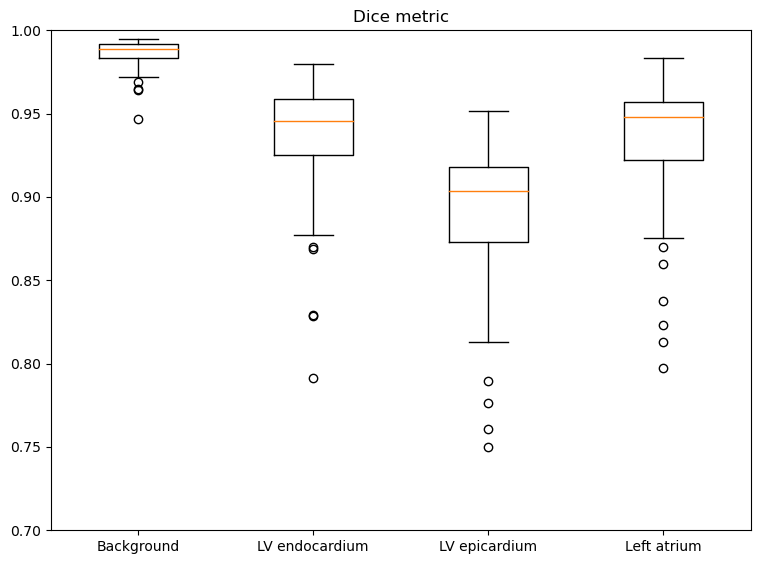

In [25]:
fig = plt.figure(figsize =(7, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Background', 'LV endocardium','LV epicardium', 'Left atrium'])

plt.title("Dice metric")
ax.boxplot(dice_data)
plt.ylim(0.7, 1)
plt.show()

In [26]:
# Finding the 1st quartile
q1 = np.quantile(LVEndo_dice, 0.25)
# Finding the 3rd quartile
q3 = np.quantile(LVEndo_dice, 0.75)

# Finding the iqr region
iqr = q3-q1
 
# Finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

# Compute outliers percentage
x = 0
for i in (LVEndo_dice):
    if i < lower_bound: x+=1
        
print('The percentatge of outliers in the Lef Ventricle Endocardium is of', x*len(LVEndo_dice)/100,'%')
print('The mean is: ', np.mean(LVEndo_dice))

The percentatge of outliers in the Lef Ventricle Endocardium is of 5.0 %
The mean is:  0.9363333275297897


# CAMUS - Overlapped visualization with legend

In [3]:
prediction_folder = 'D:/TFG/Results/Task250_2DLeftVentricle'
testing_folder = 'D:/TFG/Database/testing'
ground_truth_folder = 'D:/TFG/Results/groundtruth'
patient = '0001'
view = '4CH'

ED_path = ('{}/patient{}/patient{}_{}_ED.mhd'.format(testing_folder, patient, patient, view))
ED = io.imread(ED_path, plugin='simpleitk')

ES_path = ('{}/patient{}/patient{}_{}_ES.mhd'.format(testing_folder, patient,  patient, view))
ES = io.imread(ES_path, plugin='simpleitk')

ED_pred_path = ('{}/patient{}_{}_ED.nii'.format(prediction_folder, patient, view))
ED_pred = io.imread(ED_pred_path, plugin='simpleitk')

ED_gt_path = ('{}/patient{}_{}_ED.nii'.format(ground_truth_folder, patient, view))
ED_gt = io.imread(ED_gt_path, plugin='simpleitk')

ES_pred_path = ('{}/patient{}_{}_ES.nii'.format(prediction_folder, patient, view))
ES_pred = io.imread(ES_pred_path, plugin='simpleitk')

ES_gt_path = ('{}/patient{}_{}_ES.nii'.format(ground_truth_folder, patient, view))
ES_gt = io.imread(ES_gt_path, plugin='simpleitk')

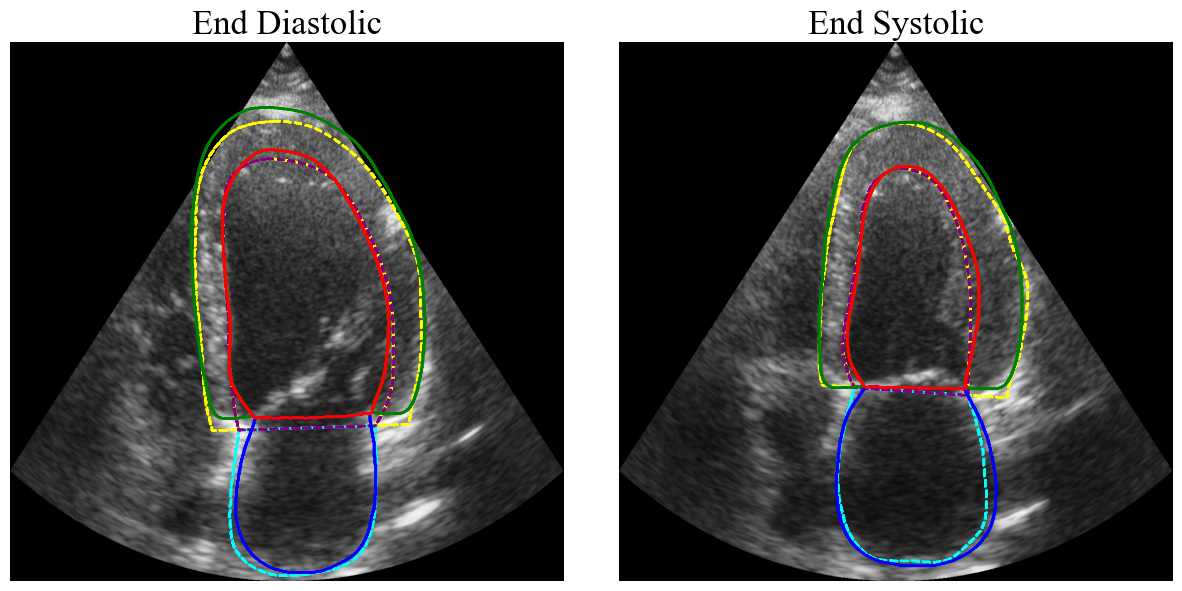

In [11]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
csfont = {'fontname':'Times New Roman'}

fig = plt.figure(figsize=(15, 7))
gs = fig.add_gridspec(1, 2, hspace=0.1, wspace=0.1)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')

# END-DIASTOLI
ax1.imshow(ED[0], cmap='gray')
ax1.contour(ED_gt[0]==2, colors='yellow', linestyles='dashed')
ax1.contour(ED_gt[0]==3, colors='cyan', linestyles='dashed')
ax1.contour(ED_gt[0]==1, colors='purple', linestyles='dashed')
ax1.contour(ED_pred[0]==2, colors='g')
ax1.contour(ED_pred[0]==3, colors='b')
ax1.contour(ED_pred[0]==1, colors='r')
ax1.axis('off')
ax1.axis('auto')
ax1.set_title("End Diastolic", fontsize=25, **csfont)

# END-SYSTOLIC
ax2.imshow(ES[0], cmap='gray')
ax2.contour(ES_gt[0]==2, colors='yellow', linestyles='dashed')
ax2.contour(ES_gt[0]==3, colors='cyan', linestyles='dashed')
ax2.contour(ES_gt[0]==1, colors='purple', linestyles='dashed')
ax2.contour(ES_pred[0]==2, colors='g')
ax2.contour(ES_pred[0]==3, colors='b')
ax2.contour(ES_pred[0]==1, colors='r')
ax2.axis('auto')
ax2.axis('off')
ax2.set_title("End Systolic", fontsize=25, **csfont)

lines = [Line2D([0], [0], color='g', lw=2, label='LV Epi'),
        Line2D([0], [0], color='r', lw=2, label='LV Endo'),
        Line2D([0], [0], color='b', lw=2, label='LA')]

countour = [Line2D([0], [0], color='black', lw=1, label='Ground truth', linestyle='dashed'),
           Line2D([0], [0], color='black', lw=1, label='Segmentation', linestyle='solid')]

# Create the figure
# legend2 = ax2.legend(handles=lines, loc='upper right', bbox_to_anchor=(1.25, 0.65))
# ax2.add_artist(legend2)
# ax2.legend(handles=countour, loc='upper right', bbox_to_anchor=(1.3, 0.5))

fig.savefig('C:/Users/Oriol/Desktop/Universitat/TFG/CAMUS_example', bbox_inches='tight', transparent=True, pad_inches=0)

# CAMUS - Optical flow try

In [143]:
from skimage import io
import cv2
import numpy as np

def compute_color_flow_map(flow):
    UNKNOWN_FLOW_THRESH = 1e9  # this is how an unknown optical flow is marked in the ground truth
    idx = np.abs(flow) > UNKNOWN_FLOW_THRESH

    flow = np.copy(flow)    
    flow[idx] = 0

    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv = np.zeros(flow.shape[:2] + (3,), dtype=np.uint8)
    hsv[..., 0] = 90 * ang / np.pi
    hsv[..., 1] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    hsv[..., 2] = 255

    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

In [56]:
# I3 = io.imread('D:/TFG/Database/testing/patient0050/patient0050_4CH_ED.mhd')
# I4 = io.imread('D:/TFG/Database/testing/patient0050/patient0050_4CH_ES.mhd')
I3 = io.imread('D:/TFG/Database/testing/patient0001/patient0001_4CH_sequence.mhd')
               
optical_flow = cv2.optflow.createOptFlow_DualTVL1()
optical_flow.setLambda(0.01) # by default lambda = 0.15
flow = optical_flow.calc(I3[0], I3[1], None)

(-32.5, 682.5, -54.0, 1156.0)

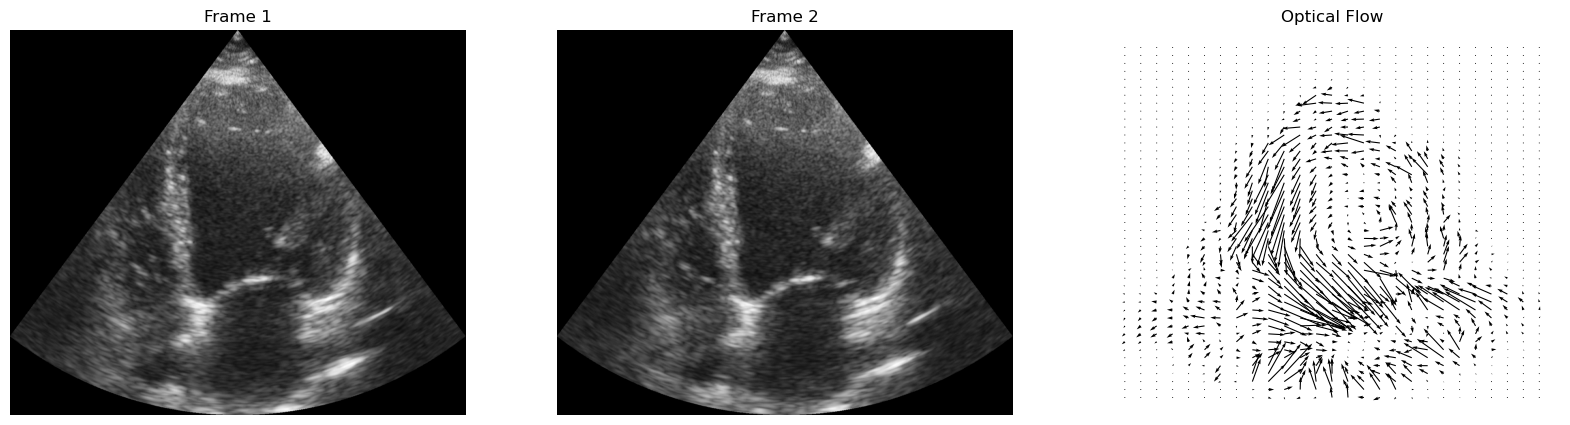

In [57]:
step = 25

plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.title('Frame 1')
plt.imshow(I3[1], cmap='gray')
plt.axis('off')
plt.axis('auto')

plt.subplot(132)
plt.title('Frame 2')
plt.imshow(I3[2], cmap='gray')
plt.axis('off')
plt.axis('auto')

plt.subplot(133)
plt.title('Optical Flow')
plt.quiver(np.arange(0, I3[0].shape[1], step), np.arange(I3[0].shape[0] - 1, -1, -step), 
           flow[::step, ::step, 0], -flow[::step, ::step, 1])
plt.axis('off');
plt.axis('auto')